In [2]:
# comparing dardar and 2c-ice data here alone using a full year
#  of cloudsat day+night data
import glob
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.colors as colors

In [3]:
dir = '/home/dudavid/projects/iwp/grids/' 
yr = '08'  #only year done with 2c-ice data

mi,ma = 1,400 ## vmin,vmax for global mean grid plots
nx,ny = 144,72
ns = 80
yy = 90-ns
yoff = int(yy/2.5)

In [4]:
# read in x months of DARDAR data on 2.5deg grid
dcts = sorted(glob.glob(dir+'dardar.*.144x.72y.iwptot.cts.hist.v1.08*.cts.npy'))#+sorted(glob.glob(dir+'dardar.144x.72y.iwptot.cts.hist.v1.*.cts.npy'))
dtot = sorted(glob.glob(dir+'dardar.*.144x.72y.iwptot.cts.hist.v1.08*.tot.npy'))#+sorted(glob.glob(dir+'dardar.144x.72y.iwptot.cts.hist.v1.*.tot.npy'))
darcount = np.zeros([ny,nx])
dartots  = np.zeros([ny,nx])
ndar = len(dcts)
print('number dardar monthly files used: ',ndar)
if ndar != len(dtot): print('unequal!')
for d in range(ndar):
    darcount += np.load(dcts[d])
    dartots  += np.load(dtot[d])
    
darmean = np.zeros([ny,nx])
nonz = [darcount > 0]
darmean[nonz] = dartots[nonz]/darcount[nonz]
print(info(darmean))
#fig7 = plt.figure(figsize=[11,5])
#grdmap((darmean[yoff:ny-yoff,:])*1000,-180,-ns,mi,ma,1,'DARDAR IWP mean, 20'+yr,r'$IWP [g/m^2]$')
#fig7.savefig('img/dardar.iw.'+str(ndar)+'months.day.v1.jpg',dpi=500) # 'aday' for atrain day (around 13.5LT)

# zonal means from mean of monthly grids (justified by symmetric sampling across lat bands):
dar_zonal = np.array(np.nanmean(darmean[:,:],axis=1))

number dardar monthly files used:  24
[0.0, 0.63450193534374943, 0.10639024048118648, 0.090405818326227239]


In [5]:
# read in x*10 days of 2C-ICE data on 2.5deg grid
icts = sorted(glob.glob(dir+'ice2c.all.144x.72y.iwp.v1.08*.cts.npy')) #data in g/m^2 already!
itot = sorted(glob.glob(dir+'ice2c.all.144x.72y.iwp.v1.08*.tot.npy'))
icecount = np.zeros([ny,nx])
icetots  = np.zeros([ny,nx])
nice = len(icts)
print('number 2cice 10day files used: ',nice)
if nice != len(itot): print('unequal!')
for d in range(nice):
    icc = np.load(icts[d])
    ict = np.load(itot[d])
    icc[np.where(ict!=ict)] = 0 #for some reason, a few nan points in 2c-ice totals arrays
    ict[np.where(ict!=ict)] = 0
    icecount += icc
    icetots  += ict
    #print(np.where(icetots!=icetots),d)
    
icemean = np.zeros([ny,nx])
nonz = [icecount > 0]
icemean[nonz] = icetots[nonz]/icecount[nonz]
#print(np.where(icemean!=icemean))
print(info(icemean))
#fig7 = plt.figure(figsize=[11,5])
#grdmap((icemean[yoff:ny-yoff,:]),-180,-ns,mi,ma,1,'2C-ICE IWP mean, '+str(nice)+' 10days',r'$IWP [g/m^2]$')
#fig7.savefig('img/dardar.iw.'+str(ndar)+'months.day.v1.jpg',dpi=500) # 'aday' for atrain day (around 13.5LT)

# zonal means from mean of monthly grids:
ice_zonal = np.array(np.nanmean(icemean[:,:],axis=1))

number 2cice 10day files used:  32
[0.0, 713.4262861983251, 109.70160644284269, 97.425755817248685]


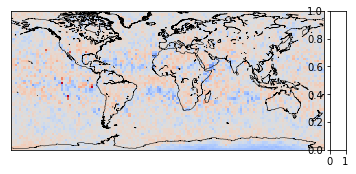

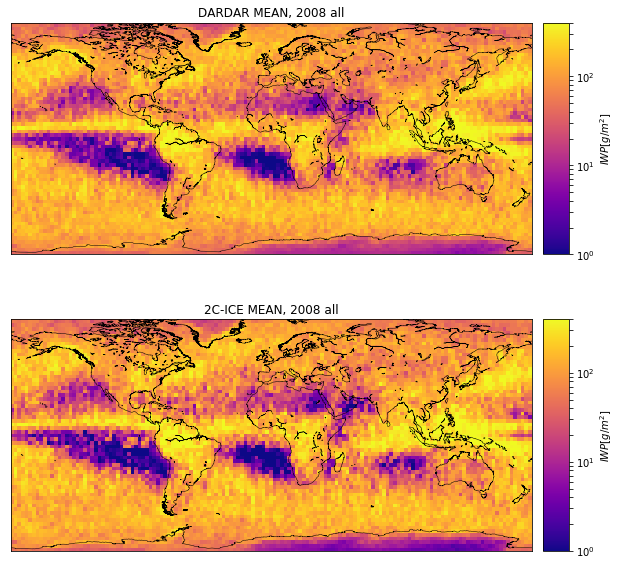

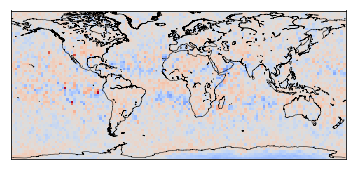

In [10]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=[10,10]) #width,height
plt.subplots_adjust(wspace=0.05) 
lamin,lomin = -ns,-180
ys, xs = np.shape(icemean[yoff:ny-yoff,:]) # grid size for lat and lon
lons = np.linspace(lomin,abs(lomin),xs)
lats = np.linspace(lamin,abs(lamin),ys)
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[0])
m.drawcoastlines(linewidth=0.5)
x, y = m(lons, lats)
norm = colors.LogNorm(vmin=mi,vmax=ma)
cmap = plt.get_cmap('plasma')
m.pcolormesh(x,y, darmean[yoff:ny-yoff,:]*1000, norm=norm,cmap=cmap, latlon=True)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = m.colorbar(sm)#, ticks=np.linspace(0,2,N),boundaries=np.arange(-0.05,2.1,.1))

#cb = m.colorbar(ax=ax[0],fig=fig)#,mappable=m)
cb.set_label(r'$IWP [g/m^2]$')
ax[0].set_title('DARDAR MEAN, 2008 all')
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360,ax=ax[1])
m.drawcoastlines(linewidth=0.5)
m.pcolormesh(x,y, icemean[yoff:ny-yoff,:], norm=colors.LogNorm(vmin=mi,vmax=ma),cmap=plt.get_cmap('plasma'),latlon=True)
#cb = m.colorbar(ax=ax[1])
cb = m.colorbar(sm)#, ticks=np.linspace(0,2,N),boundaries=np.arange(-0.05,2.1,.1))
cb.set_label(r'$IWP [g/m^2]$')
ax[1].set_title('2C-ICE MEAN, 2008 all')
plt.show()

cmap = cm.coolwarm #plt.get_cmap('plasma')
m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,urcrnrlat=abs(lamin),llcrnrlon=lomin,urcrnrlon=lomin+360)#,ax=ax[2])
m.drawcoastlines(linewidth=0.5)
m.pcolormesh(x,y, 100*(icemean[yoff:ny-yoff,:] - 1000*darmean[yoff:ny-yoff,:])/(icemean[yoff:ny-yoff,:]*.5+5000*darmean[yoff:ny-yoff,:]), \
             vmin=-30,vmax=30,cmap=cmap,latlon=True)
#sm.set_array([])
#sm = plt.cm.ScalarMappable(cmap=cmap)
#cb = m.colorbar(sm)#, ticks=np.linspace(0,2,N),boundaries=np.arange(-0.05,2.1,.1))
##cb = m.colorbar(ax=ax[2])
cb.set_label('IWP Difference [Percent]')
#ax[2].set_title('2C-ICE - DARDAR')
##dif = 100*(icemean[yoff:ny-yoff,:] - 1000*darmean[yoff:ny-yoff,:])/(icemean[yoff:ny-yoff,:]*.5+5000*darmean[yoff:ny-yoff,:])
plt.show()
#print(info(abs(dif)))

#fig.savefig('img/radars.iwpmean.20'+yr+'.v1.jpg',dpi=450)

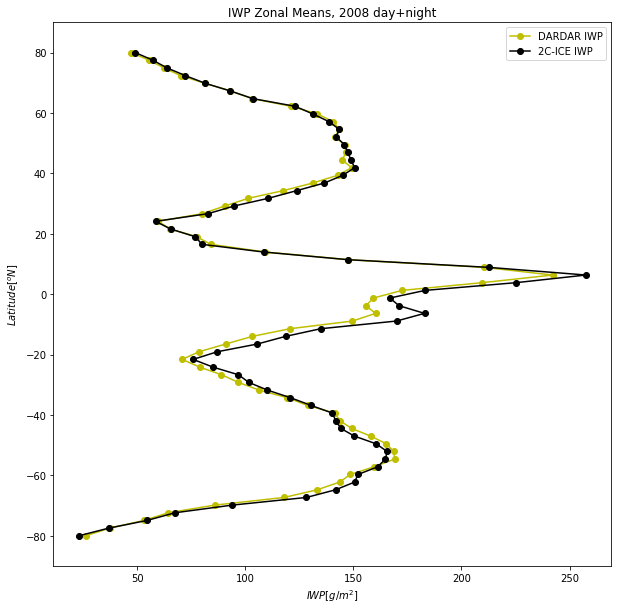

0.969200116552


In [13]:
figz = plt.figure(figsize=[10,10])
zaxd= np.linspace(-ns,ns,int(ns*2/2.5)) # avoid 3 on each end, no DAR above 80ish
plt.plot(1000*dar_zonal[yoff:ny-yoff],zaxd,'y-o',label='DARDAR IWP')
plt.plot(ice_zonal[4:68],zaxd,'k-o',label='2C-ICE IWP')
plt.xlabel(r'$IWP [g/m^2]$')
plt.ylabel(r'$Latitude [^oN]$')
axes = plt.gca()
axes.set_ylim([-90,90])
plt.title('IWP Zonal Means, 20'+yr+' day+night')
plt.legend()
plt.show()
#figz.savefig('img/all.20'+yr+'.aday.zonal.jpg',dpi=400)
print(np.mean(1000*dar_zonal[yoff:ny-yoff])/np.mean(ice_zonal[4:68]))

In [6]:
#import scipy.ndimage as ndimage